In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [155]:
data = "train.csv"
titanic_data = pd.read_csv(data)

In [156]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [158]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [160]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

C:\Users\kkast\AppData\Local\Temp\ipykernel_12524\3516126430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


In [161]:
print(titanic_data['Embarked'].mode()[0])

S


In [162]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

C:\Users\kkast\AppData\Local\Temp\ipykernel_12524\3993763136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [163]:
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [164]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [165]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## finding the number of people survied or not 


In [166]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [167]:
sns.set()

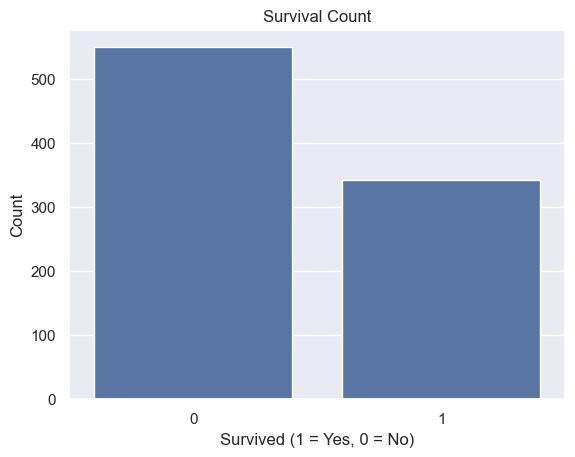

In [168]:
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

In [169]:
print(titanic_data['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


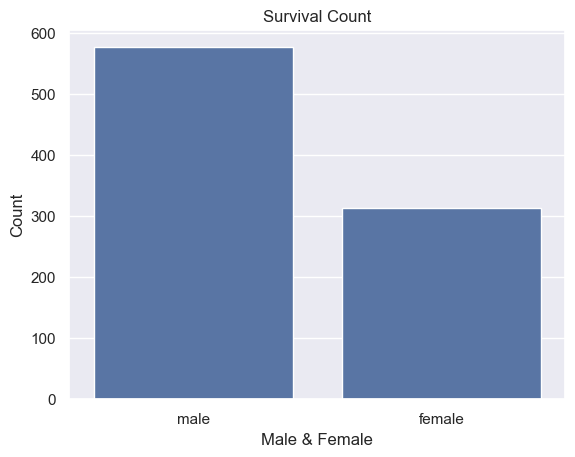

In [170]:
sns.countplot(x='Sex', data=titanic_data)
plt.title('Survival Count')
plt.xlabel('Male & Female')
plt.ylabel('Count')
plt.show()


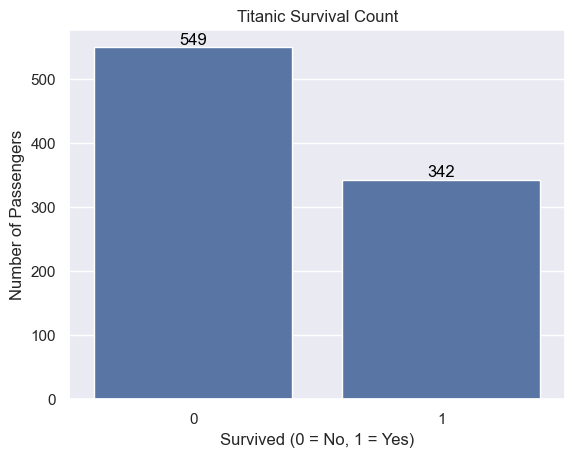

In [171]:

ax = sns.countplot(x='Survived', data=titanic_data)

# Add count labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 5,                        
        str(int(height)),                  
        ha='center', fontsize=12, color='black'
    )

# Add labels and title
plt.title("Titanic Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")

# Show the plot
plt.show()


## find the how many of the passengers survived based on the gender 


In [172]:
group_data = titanic_data.groupby(['Sex', 'Survived']).size()
print(group_data)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64


In [173]:
group_data = titanic_data.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
print(group_data)

      Sex  Survived  Count
0  female         0     81
1  female         1    233
2    male         0    468
3    male         1    109


Text(0.5, 0, 'Gender')

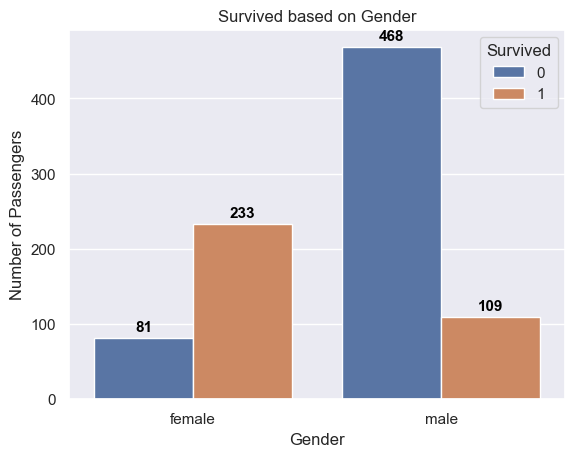

In [174]:
ax = sns.barplot(x='Sex', y='Count', hue='Survived', data=group_data)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=11, color='black', weight='bold')

plt.title('Survived based on Gender')
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')


In [175]:
cont_of_pclass = titanic_data['Pclass'].value_counts()

In [176]:
group_pclass= titanic_data.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')
print(group_pclass)

   Pclass  Survived  Count
0       1         0     80
1       1         1    136
2       2         0     97
3       2         1     87
4       3         0    372
5       3         1    119


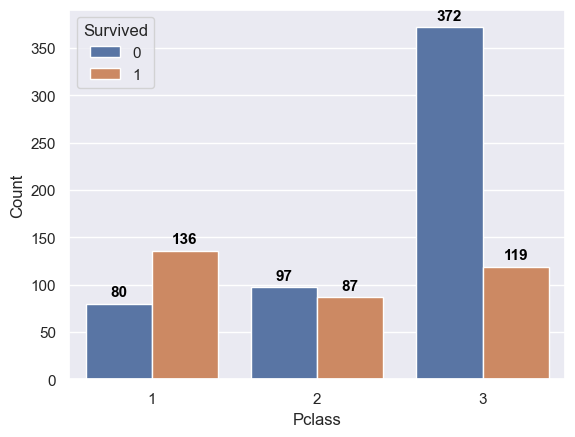

In [177]:
px = sns.barplot(x='Pclass', y='Count', hue='Survived', data= group_pclass)
for container in px.containers:
    px.bar_label(container, label_type='edge', padding=3, fontsize=11, color='black', weight='bold')



In [178]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [179]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [180]:
titanic_data.replace({
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}
}, inplace=True)


C:\Users\kkast\AppData\Local\Temp\ipykernel_12524\1782619267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({


In [181]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [182]:
X = titanic_data.drop(['PassengerId', 'Name', 'Survived', 'Ticket'], axis=1)
Y = titanic_data['Survived']

In [183]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [184]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Spliting the data into train and test data 

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 2)

In [186]:
print(X.shape, X_test.shape, X_train.shape)

(891, 7) (179, 7) (712, 7)


## Training the Model

In [187]:
#Logistic Regression
model = LogisticRegression()

In [188]:
#training the regression model with training data
model.fit(X_train, Y_train)

c:\Users\kkast\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [189]:
X_train_prediction = model.predict(X_train)

In [190]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [191]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,0,42.000000,0,0,26.2875,0
37,3,0,21.000000,0,0,8.0500,0
615,2,1,24.000000,1,2,65.0000,0
169,3,0,28.000000,0,0,56.4958,0
68,3,1,17.000000,4,2,7.9250,0
...,...,...,...,...,...,...,...
89,3,0,24.000000,0,0,8.0500,0
80,3,0,22.000000,0,0,9.0000,0
846,3,0,29.699118,8,2,69.5500,0
870,3,0,26.000000,0,0,7.8958,0


In [192]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('The accuracy of the model :',training_data_accuracy)

The accuracy of the model : 0.8075842696629213


In [193]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [194]:
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy score on test Data: ", testing_data_accuracy)

Accuracy score on test Data:  0.7821229050279329
